<a href="https://colab.research.google.com/github/angiecombs11-ops/PurdueHW/blob/main/7_01practice12_7_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into Pandas dataFrame
df = pd.read_csv('/content/Retail_Store_Data.csv')

# get_ipython().system('pip install bernoulli')
# import bernoulli

# Bernoulli distribution parameters

In [16]:
# Generating Bernoulli disribution data
data_bernolli = np.random.binomial(1, 0.5, 1000)


In [21]:
import numpy as np
from scipy.stats import binom

# Calculate the probability 'p' of a customer spending over $100
p_spend_over_100 = (df['Purchase_Amount'] > 100).mean()
print(f"The probability (p) of a customer spending over $100 is: {p_spend_over_100:.4f}")

# Define the number of trials 'n'
n_trials = 10
print(f"Number of random visits (n): {n_trials}")

The probability (p) of a customer spending over $100 is: 0.8530
Number of random visits (n): 10


Now we have our parameters for the Binomial Distribution:

*   **n = 10**: This is the number of independent trials (random visits).
*   **p = `p_spend_over_100`**: This is the probability of 'success' on any given trial (a customer spending over $100).

The Binomial Distribution allows us to calculate the probability of observing a certain number of 'successes' (customers spending over $100) within these 10 trials. For example, we can calculate the probability of exactly 5 customers spending over $100 out of 10 visits, or the probability of at least 7 customers spending over $100.

Probability of exactly 5 customers spending over $100: 0.0078
Probability of at least 7 customers spending over $100: 0.9532


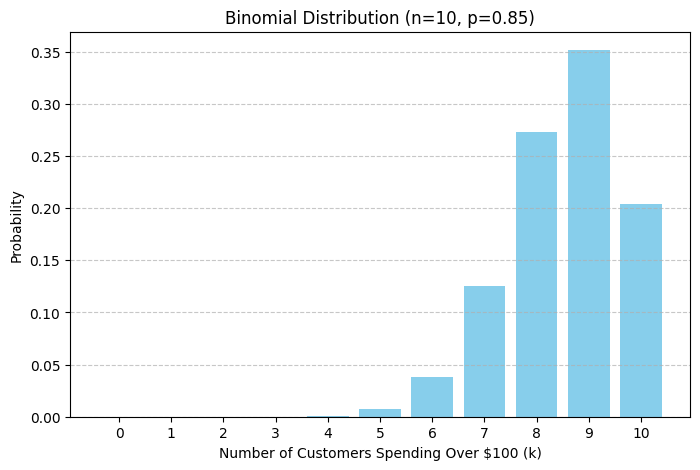

In [22]:
# Example: Probability of exactly 5 customers spending over $100 out of 10 visits
k_successes = 5
probability_exactly_5 = binom.pmf(k_successes, n_trials, p_spend_over_100)
print(f"Probability of exactly {k_successes} customers spending over $100: {probability_exactly_5:.4f}")

# Example: Probability of at least 7 customers spending over $100 out of 10 visits
# This is 1 - P(X < 7) = 1 - P(X <= 6)
probability_at_least_7 = 1 - binom.cdf(6, n_trials, p_spend_over_100)
print(f"Probability of at least 7 customers spending over $100: {probability_at_least_7:.4f}")

# Optional: Visualize the Binomial Distribution PMF for n=10 and the calculated p
import matplotlib.pyplot as plt

x = np.arange(0, n_trials + 1)
pmf = binom.pmf(x, n_trials, p_spend_over_100)

plt.figure(figsize=(8, 5))
plt.bar(x, pmf, color='skyblue')
plt.title(f'Binomial Distribution (n={n_trials}, p={p_spend_over_100:.2f})')
plt.xlabel('Number of Customers Spending Over $100 (k)')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np

# Define the average rate (lambda) of customers per hour
lambda_customers = 15
print(f"Average number of customers per hour (λ): {lambda_customers}")

# Example: Probability of exactly 10 customers visiting in an hour
k_exact = 10
prob_exact_10 = poisson.pmf(k_exact, lambda_customers)
print(f"Probability of exactly {k_exact} customers visiting in an hour: {prob_exact_10:.4f}")

# Example: Probability of more than 20 customers visiting in an hour
# This is 1 - P(X <= 20)
k_less_than_or_equal_20 = 20
prob_more_than_20 = 1 - poisson.cdf(k_less_than_or_equal_20, lambda_customers)
print(f"Probability of more than {k_less_than_or_equal_20} customers visiting in an hour: {prob_more_than_20:.4f}")

Average number of customers per hour (λ): 15
Probability of exactly 10 customers visiting in an hour: 0.0486
Probability of more than 20 customers visiting in an hour: 0.0830


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate Mean and Standard Deviation
mean_purchase_amount = df['Purchase_Amount'].mean()
std_purchase_amount = df['Purchase_Amount'].std()

print(f"Mean Purchase Amount: {mean_purchase_amount:.2f}")
print(f"Standard Deviation of Purchase Amount: {std_purchase_amount:.2f}")

Mean Purchase Amount: 150.97
Standard Deviation of Purchase Amount: 48.96


Now that we have the mean and standard deviation, let's visualize the distribution of `Purchase_Amount` using a histogram and a Q-Q plot. These plots will help us visually assess if the data resembles a normal distribution.

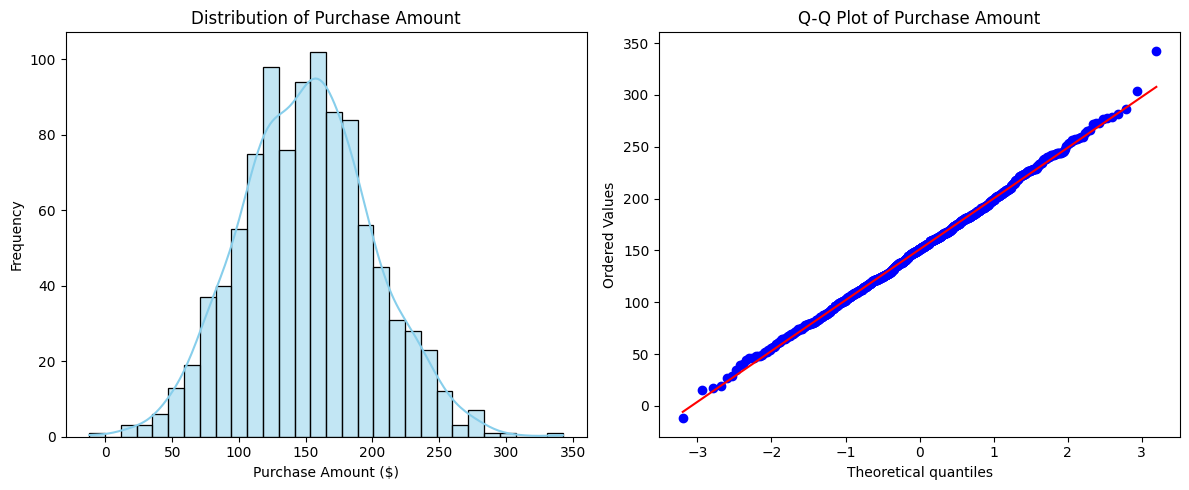

In [26]:
# Visualize the distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # Histogram
sns.histplot(df['Purchase_Amount'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # Q-Q Plot
stats.probplot(df['Purchase_Amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Purchase Amount')

plt.tight_layout()
plt.show()

Visual inspection can be helpful, but to formally test for normality, we'll use statistical tests such as the Shapiro-Wilk test or D'Agostino's K-squared test. A common interpretation is that if the p-value is greater than a chosen significance level (e.g., 0.05), we fail to reject the null hypothesis, suggesting the data *could* be normally distributed.

In [27]:
# Perform statistical tests for normality
# Shapiro-Wilk Test (good for sample sizes < 5000)
shapiro_stat, shapiro_p = stats.shapiro(df['Purchase_Amount'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_stat:.3f}, p-value={shapiro_p:.3f}")

# D'Agostino's K-squared Test (good for larger sample sizes)
k2_stat, k2_p = stats.normaltest(df['Purchase_Amount'])
print(f"D'Agostino's K-squared Test: Statistic={k2_stat:.3f}, p-value={k2_p:.3f}")

alpha = 0.05
print(f"\nSignificance Level (alpha) = {alpha}")

if shapiro_p > alpha:
    print("Shapiro-Wilk Test: Fail to reject H0 (data looks Gaussian)")
else:
    print("Shapiro-Wilk Test: Reject H0 (data does not look Gaussian)")

if k2_p > alpha:
    print("D'Agostino's K-squared Test: Fail to reject H0 (data looks Gaussian)")
else:
    print("D'Agostino's K-squared Test: Reject H0 (data does not look Gaussian)")

Shapiro-Wilk Test: Statistic=0.999, p-value=0.627
D'Agostino's K-squared Test: Statistic=2.576, p-value=0.276

Significance Level (alpha) = 0.05
Shapiro-Wilk Test: Fail to reject H0 (data looks Gaussian)
D'Agostino's K-squared Test: Fail to reject H0 (data looks Gaussian)


The Poisson distribution allows us to understand the likelihood of different numbers of customer arrivals within that one-hour period. For instance, you can see the probability of exactly 10 customers or more than 20 customers.

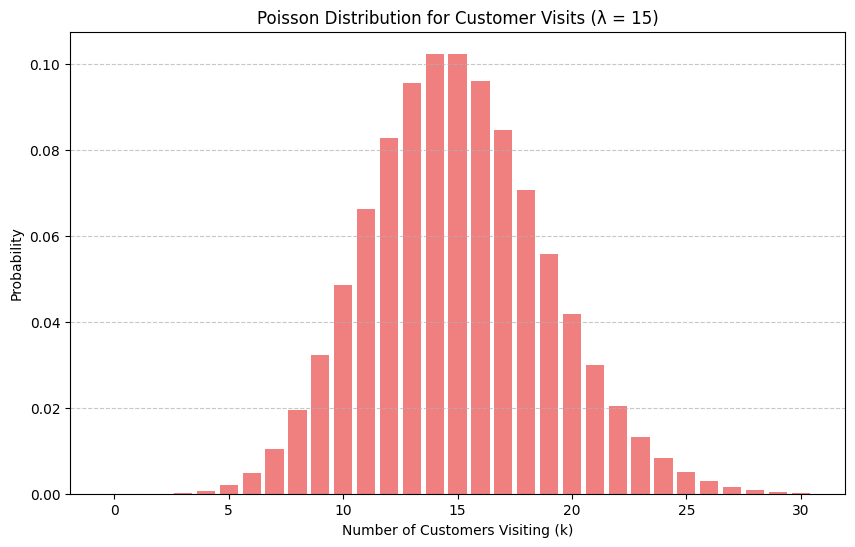

In [24]:
# Visualize the Poisson distribution

# Create a range of possible number of customers (k)
k_values = np.arange(0, 31) # From 0 to 30 customers

# Calculate the probability mass function (PMF) for each k
pmf_poisson = poisson.pmf(k_values, lambda_customers)

plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_poisson, color='lightcoral')
plt.title(f'Poisson Distribution for Customer Visits (λ = {lambda_customers})')
plt.xlabel('Number of Customers Visiting (k)')
plt.ylabel('Probability')
plt.xticks(np.arange(0, 31, 5)) # Set x-axis ticks for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
p_spent_more_than_30_mins = df['Spent_More_Than_30_Mins'].mean()
print(f"The probability (p) of a customer spending more than 30 minutes in the store is: {p_spent_more_than_30_mins:.4f}")

The probability (p) of a customer spending more than 30 minutes in the store is: 0.8130


This calculated probability `p` is the single parameter that defines the Bernoulli distribution for the `Spent_More_Than_30_Mins` variable. It tells us the likelihood of a randomly selected customer spending more than 30 minutes in the store based on your dataset.

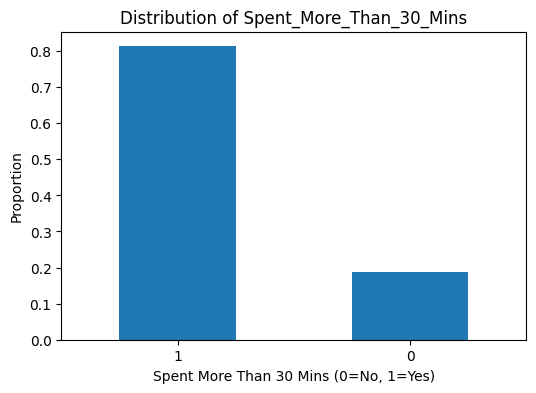

In [19]:
# Optional: Visualize the distribution of the binary variable
plt.figure(figsize=(6, 4))
df['Spent_More_Than_30_Mins'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Spent_More_Than_30_Mins')
plt.xlabel('Spent More Than 30 Mins (0=No, 1=Yes)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [17]:
df['Spent_More_Than_30_Mins'] = (df['Visit_Duration'] > 30).astype(int)
display(df.head())

,Customer_ID,Purchase_Amount,Visit_Duration,Items_Purchased,Store_Section,Weekday,Spent_More_Than_30_Mins
0,1,174.835708,28.423084,2,Groceries,Tuesday,0
1,2,143.086785,21.502462,7,Electronics,Sunday,0
2,3,182.384427,80.007327,5,Apparel,Saturday,1
3,4,226.151493,87.712330,5,Groceries,Saturday,1
4,5,138.292331,13.474476,8,Groceries,Tuesday,0


# New Section

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Get min and max visit duration from the dataset
min_duration = df['Visit_Duration'].min()
max_duration = df['Visit_Duration'].max()

print(f"Minimum Visit Duration (a): {min_duration:.2f} minutes")
print(f"Maximum Visit Duration (b): {max_duration:.2f} minutes")

Minimum Visit Duration (a): 10.35 minutes
Maximum Visit Duration (b): 119.94 minutes


For a **continuous uniform distribution** defined by parameters `a` (minimum) and `b` (maximum):

*   **Probability Density Function (PDF):** `f(x) = 1 / (b - a)` for `a <= x <= b`, and `0` otherwise. This means the probability density is constant for all values within the range.
*   **Cumulative Distribution Function (CDF):** `F(x) = (x - a) / (b - a)` for `a <= x <= b`. This gives the probability that a random variable takes a value less than or equal to `x`.

Let's visualize how this theoretical uniform distribution compares to the actual distribution of `Visit_Duration` in your data.

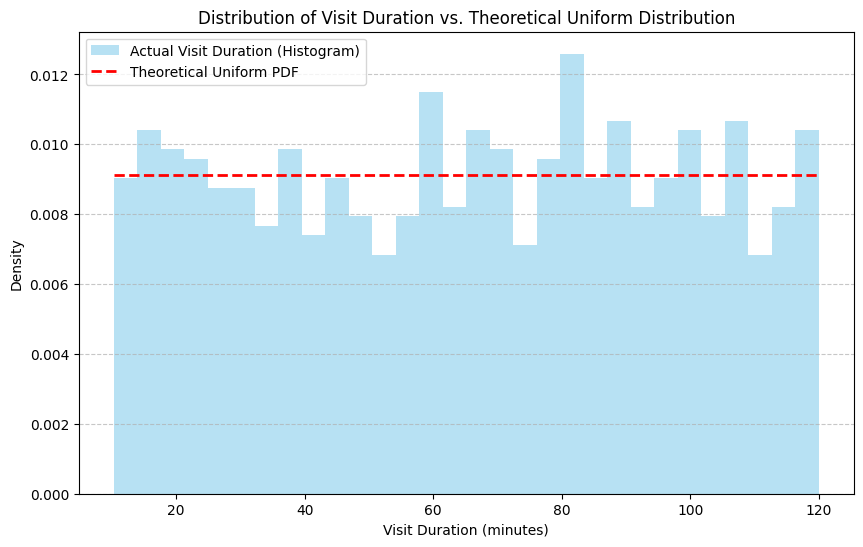


Probability of a visit lasting between 30 and 60 minutes (assuming uniform distribution): 0.2738


In [29]:
# Create a range of x values for plotting the theoretical PDF
x = np.linspace(min_duration, max_duration, 500)

# Calculate the PDF of the uniform distribution
# The 'loc' parameter is 'a' (min) and 'scale' parameter is 'b - a' (range)
pdf_uniform = uniform.pdf(x, loc=min_duration, scale=(max_duration - min_duration))

plt.figure(figsize=(10, 6))

# Plot histogram of actual Visit_Duration
plt.hist(df['Visit_Duration'], bins=30, density=True, alpha=0.6, color='skyblue', label='Actual Visit Duration (Histogram)')

# Plot theoretical Uniform PDF
plt.plot(x, pdf_uniform, color='red', linestyle='--', linewidth=2, label='Theoretical Uniform PDF')

plt.title('Distribution of Visit Duration vs. Theoretical Uniform Distribution')
plt.xlabel('Visit Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Example: Calculate the probability of a visit lasting between 30 and 60 minutes
prob_30_to_60 = uniform.cdf(60, loc=min_duration, scale=(max_duration - min_duration)) - \
                uniform.cdf(30, loc=min_duration, scale=(max_duration - min_duration))

print(f"\nProbability of a visit lasting between 30 and 60 minutes (assuming uniform distribution): {prob_30_to_60:.4f}")

## Summary of Analyses

We have successfully completed all the requested analyses on your retail store data. Here's a comprehensive summary of our session:

1.  **Data Preparation and Bernoulli Distribution Analysis:**
    *   We created a binary variable `Spent_More_Than_30_Mins` (1 for Yes, 0 for No) based on `Visit_Duration`.
    *   Analyzing this with a Bernoulli distribution, we found that the probability (p) of a customer spending more than 30 minutes in the store is **0.8130**. We also visualized this distribution.

2.  **Binomial Distribution Analysis:**
    *   For 10 random visits, we analyzed the number of customers spending over $100.
    *   The probability (p) of a single customer spending over $100 was determined to be **0.8530**.
    *   We calculated specific probabilities: exactly 5 customers spending over $100 is **0.0078**, and at least 7 customers is **0.9532**. We also visualized the Binomial Probability Mass Function.

3.  **Poisson Distribution Analysis:**
    *   Assuming an average rate of 15 customers per hour, we analyzed customer visits using the Poisson distribution.
    *   We calculated the probability of exactly 10 customers visiting in an hour to be **0.0486**, and more than 20 customers to be **0.0830**. This distribution was also visualized.

4.  **Normality Analysis of Purchase_Amount:**
    *   We calculated the mean (**150.97**) and standard deviation (**48.96**) of `Purchase_Amount`.
    *   Visual inspection (histogram and Q-Q plot) and statistical tests (Shapiro-Wilk and D'Agostino's K-squared) indicated that the `Purchase_Amount` variable **appears to follow a normal distribution** (both p-values were greater than 0.05).

5.  **Uniform Distribution Analysis of Visit_Duration:**
    *   Assuming all time intervals are equally likely, we analyzed `Visit_Duration` using a Uniform distribution.
    *   We determined the minimum (**10.35 minutes**) and maximum (**119.94 minutes**) visit durations from your data.
    *   We calculated, for example, that the probability of a visit lasting between 30 and 60 minutes is **0.2738**. We also visualized the theoretical uniform PDF against the actual data.